Notebook that will recreate Fig. 2 (distributions of $|\Delta V|/\sigma_{\Delta V}$ and $|\Delta V|/V_{min}$) in the DR1 TF paper.

In [5]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data

In [9]:
hdul = fits.open('fig2_data.fits')

pull = hdul['PULL'].data
pull_inset = hdul['PULL_INSET'].data
Vmin = hdul['VMIN_NORM'].data

hdul.close()

In [11]:
# Recreate bin edges
pull_bins = np.zeros(len(pull['BIN_EDGE']) + 1)
pull_bins[:-1] = pull['BIN_EDGE']
pull_bins[-1] = pull['BIN_EDGE'][-1] + (pull['BIN_EDGE'][1] - pull['BIN_EDGE'][0])

pull_inset_bins = np.zeros(len(pull_inset['BIN_EDGE']) + 1)
pull_inset_bins[:-1] = pull_inset['BIN_EDGE']
pull_inset_bins[-1] = pull_inset['BIN_EDGE'][-1] + (pull_inset['BIN_EDGE'][1] - pull_inset['BIN_EDGE'][0])

Vmin_bins = np.zeros(len(Vmin['BIN_EDGE']) + 1)
Vmin_bins[:-1] = Vmin['BIN_EDGE']
Vmin_bins[-1] = Vmin['BIN_EDGE'][-1] + (Vmin['BIN_EDGE'][1] - Vmin['BIN_EDGE'][0])

# Plot

/var/folders/mg/fxh1s24d0n3_r0c39d3gs0g00000gq/T/ipykernel_88954/326623721.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


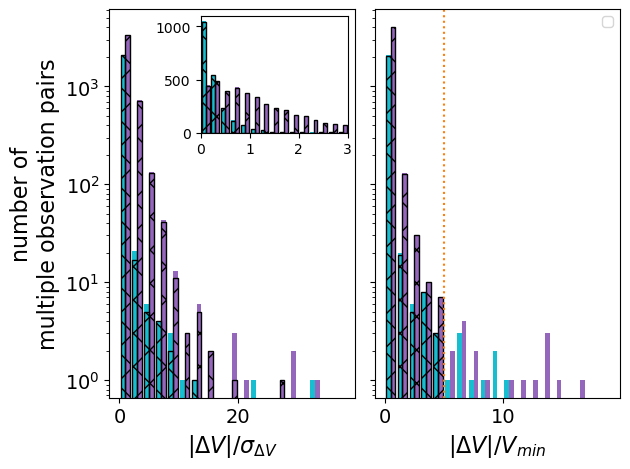

In [12]:
plt.figure(tight_layout=True)


ax1 = plt.subplot(121)
plt.hist([pull['BIN_EDGE'], pull['BIN_EDGE']], 
         pull_bins, 
         weights=[pull['N_SAME'], pull['N_OPPOSITE']], 
         color=['tab:cyan', 'tab:purple'])
plt.hist([pull['BIN_EDGE'], pull['BIN_EDGE']], 
         pull_bins, 
         weights=[pull['N_SAME_GOOD'], pull['N_OPPOSITE_GOOD']], 
         fill=False, 
         hatch='x')
plt.xlabel('$|\Delta V| / \sigma_{\Delta V}$', fontsize=16)

plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('number of\nmultiple observation pairs', fontsize=16)

axins = inset_axes(ax1, width='60%', height='30%', loc='upper right')
plt.hist([pull_inset['BIN_EDGE'], pull_inset['BIN_EDGE']], 
         pull_inset_bins, 
         weights=[pull_inset['N_SAME'], pull_inset['N_OPPOSITE']], 
         color=['tab:cyan', 'tab:purple'])
plt.hist([pull_inset['BIN_EDGE'], pull_inset['BIN_EDGE']], 
         pull_inset_bins, 
         weights=[pull_inset['N_SAME_GOOD'], pull_inset['N_OPPOSITE_GOOD']], 
         fill=False, 
         hatch='x')
plt.xlim([0, 3])


ax2 = plt.subplot(122, sharey=ax1)
plt.hist([Vmin['BIN_EDGE'], Vmin['BIN_EDGE']], 
         Vmin_bins, 
         weights=[Vmin['N_SAME'], Vmin['N_OPPOSITE']], 
         color=['tab:cyan', 'tab:purple'])
plt.hist([Vmin['BIN_EDGE'], Vmin['BIN_EDGE']], 
         Vmin_bins, 
         weights=[Vmin['N_SAME_GOOD'], Vmin['N_OPPOSITE_GOOD']], 
         fill=False, 
         hatch='x')
plt.vlines(5, 0, 10000, colors='tab:orange', linestyles='dotted')

plt.legend()

plt.tick_params('x', which='major', labelsize=14)
plt.tick_params('y', labelleft=False)
plt.xlabel('$|\Delta V| / V_{min}$', fontsize=16);